# Prediction of Admission

This model predicts thr chances of a student getting into a university based on its academic record. The dataset is made available by [Mohan S Acharya](https://www.kaggle.com/mohansacharya/graduate-admissions). 

## Importing libraries 

Lets start by importing all the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing Dataset

In [6]:
dataset=pd.read_csv("Admission_Predict.csv")

Lets analyse the dataset

In [7]:
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## Finding and Handling any missing Dataset

Examining the dataset for any null values.

In [8]:
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Dropping the Serial No. as there already exists a primary key

In [9]:
dataset.drop(["Serial No."],axis=1,inplace=True)

## Data Preparation

While Examination of data it is found out that last column have a extra space leading to confusion in further analysis of data

In [10]:
dataset.rename(columns={"Chance of Admit ":"Chance of Admit"},inplace=True)

Looking the data type of each column in the dataset

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


Getting an idea over the range of all columns in the dataset

In [12]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Data Visualisation

Eamining the distribution of some features in the dataset

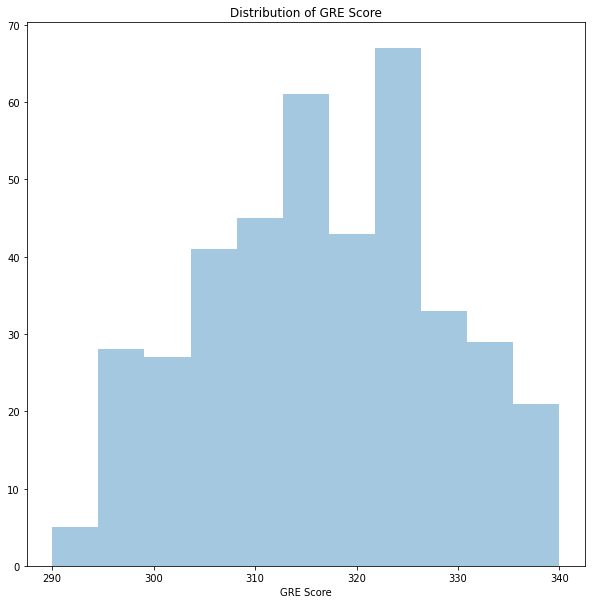

In [36]:
plt.figure(figsize=(10,10))
sns.distplot(dataset["GRE Score"],kde=False)
plt.title("Distribution of GRE Score")
plt.show()

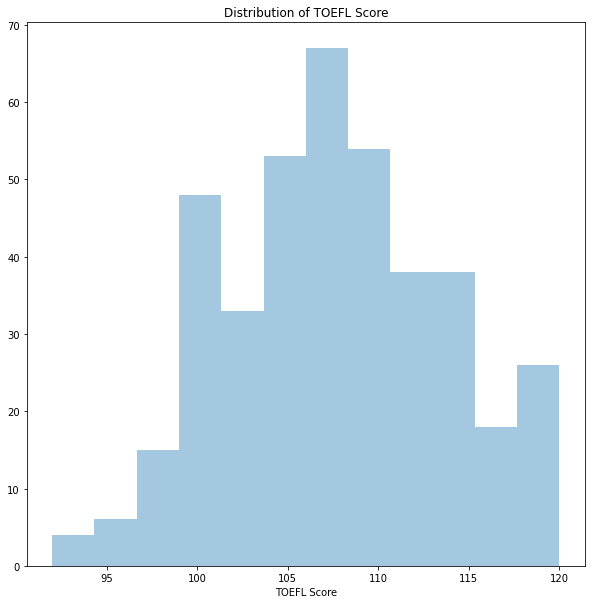

In [37]:
plt.figure(figsize=(10,10))
sns.distplot(dataset["TOEFL Score"],kde=False)
plt.title("Distribution of TOEFL Score")
plt.show()

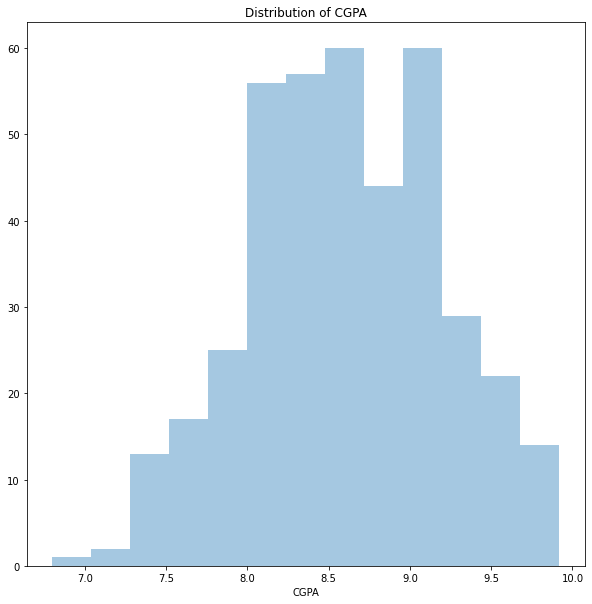

In [38]:
plt.figure(figsize=(10,10))
sns.distplot(dataset["CGPA"],kde=False)
plt.title("Distribution of CGPA")
plt.show()

Lets see the relationship between GRE Score and chances of admit

In [16]:
px.scatter(dataset,y="GRE Score",x="Chance of Admit",color="Chance of Admit",color_continuous_scale=px.colors.sequential.Cividis_r)

It seems that student with higher GRE score have high chances of getting into college .

In [17]:
px.scatter(dataset,y="TOEFL Score",x="Chance of Admit",color="Chance of Admit",color_continuous_scale=px.colors.sequential.Cividis_r)

It proves that student with higher TOEFL score have high chances of getting into college .

In [18]:
px.scatter(dataset,x="University Rating",y="Chance of Admit",color="Chance of Admit",color_continuous_scale=px.colors.sequential.Cividis_r)

From above graph it is clear that University with higer ranking have a higher tendancy to accept student

In [19]:
px.scatter(dataset,y="CGPA",x="Chance of Admit",color="Chance of Admit",color_continuous_scale=px.colors.sequential.Cividis_r)

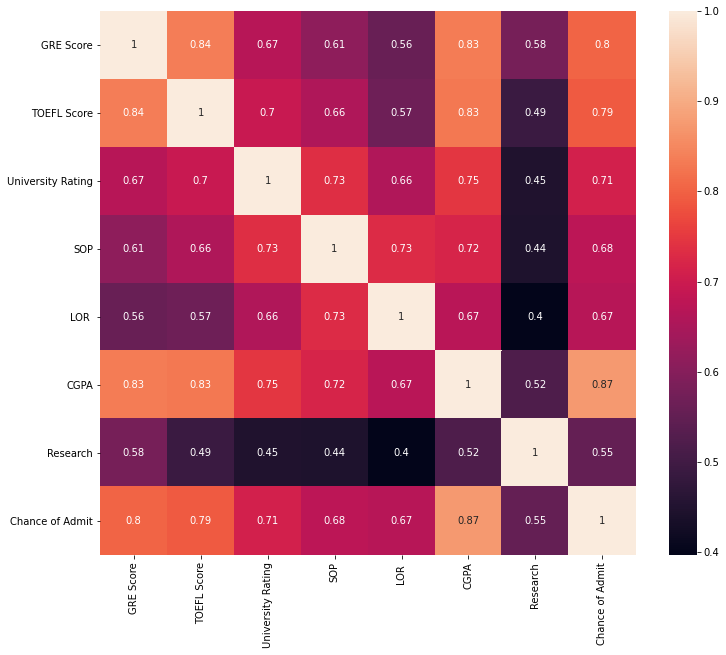

In [20]:
plt.figure(figsize=(12,10))
cor=dataset.corr()
sns.heatmap(cor,annot=True)

From the above heatmap it is clear that each feature contributes to a student’s chance of admission in a university. Hence we can’t drop any more feature from the dataset

## Splting the data

In [22]:
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [23]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

Spliting the dataset into training and testing dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Model Selection

By using this technique we will be able to select the best algorithm for our dataset

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

models=[["Linear Regression : ",LinearRegression()],
        ["Random Forest Regressor : ",RandomForestRegressor()],
        ["Decision Tree Regressor : ",DecisionTreeRegressor()],
        ["K nearest neighbors : ",KNeighborsRegressor(n_neighbors = 2)],
        ["XGB Regressor : ",XGBRegressor()]
        ]

print("Results : ")

for name,model in models:
  regressor=model
  regressor.fit(X_train,y_train)
  y_pred=regressor.predict(X_test)
  print(name, (np.sqrt(mean_squared_error(y_test,y_pred))))

Results : 
Linear Regression :  0.05926394674802317
Random Forest Regressor :  0.0617197506880901
Decision Tree Regressor :  0.08505880318932309
K nearest neighbors :  0.07034068879389793
[12:11:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Regressor :  0.05913357597212767


It seems that Linear Regression is best suited for this dataset

In [27]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.05926394674802317


In [28]:
a=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()});a.head(10)

,Actual,Predicted
0,0.73,0.721297
1,0.66,0.663631
2,0.94,0.943482
3,0.76,0.717678
4,0.71,0.732987
5,0.49,0.468964
6,0.78,0.730015
7,0.80,0.784051
8,0.96,0.961057
9,0.69,0.663956


In [29]:
a.head()

,Actual,Predicted
0,0.73,0.721297
1,0.66,0.663631
2,0.94,0.943482
3,0.76,0.717678
4,0.71,0.732987


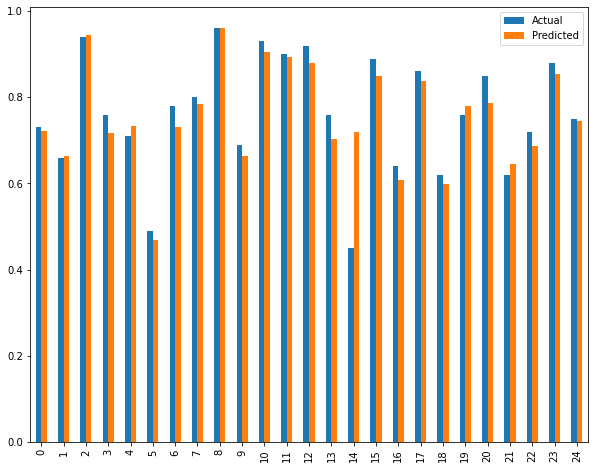

In [30]:
fig=a.head(25)
fig.plot(kind='bar',figsize=(10,8))

Let’s find Which features contribute the most to whether the student will get admission or not

In [31]:
regressor=RandomForestRegressor()
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [33]:
importance_frame=pd.DataFrame()
importance_frame["features"]=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']
importance_frame["importance"]=regressor.feature_importances_
importance_frame = importance_frame.sort_values(by=['importance'], ascending=True)

In [34]:
px.bar(importance_frame,x="features",y="importance")

Hence as we can see CGPA matters the most for admission in a University .